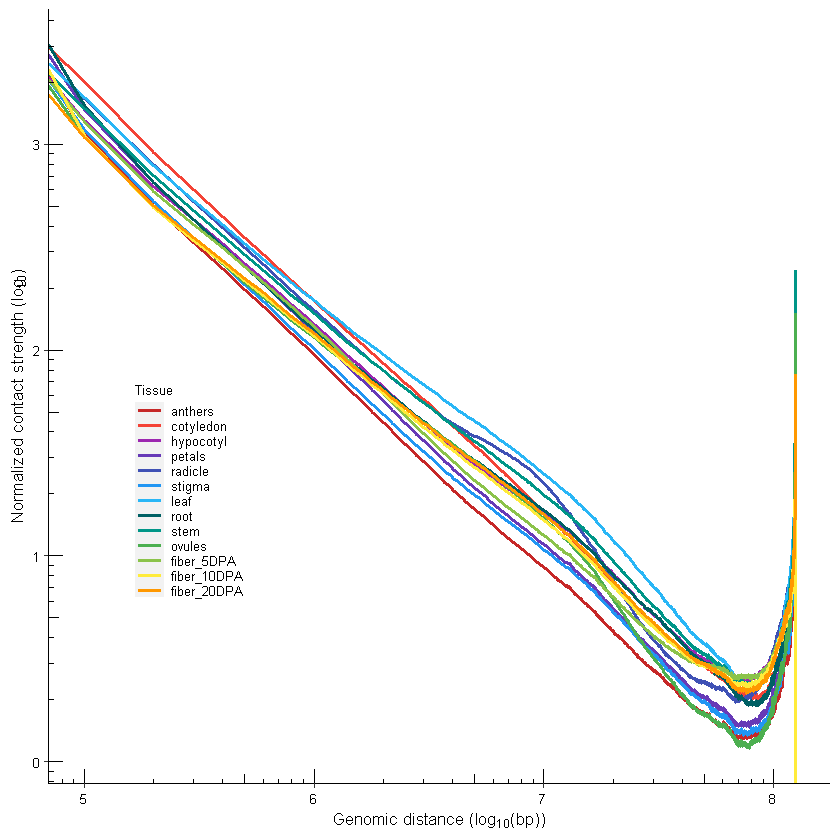

In [2]:
#分析ide的变化 
rm(list=ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/ide/fanc')
library(ggplot2)
library(reshape2)
library(paletteer)
df_ide <- read.csv('all_sample_IDE.txt', sep = '\t', header = T)
df_ide_long <- melt(df_ide, id = c("distance"))
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
#head(pore_hic)
x_lab = expression(paste("Genomic distance (log"[10], "(bp))"))
y_lab = expression(paste("Normalized contact strength (log"[10], ")"))
ide <- ggplot(df_ide_long, aes(x=log10(distance), y=log10(value), group =variable, color = variable)) +
  geom_line(size=1)+
  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  labs(x=x_lab, y=y_lab, colour="Tissue") +   #不要标签
  #geom_smooth(se = FALSE) +
  #facet_grid(subgenome~days)+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    #panel.border = element_rect(fill=NA,color="black",  linetype="solid"), # 添加边框
    axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=8,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=10), #设置标签字体
    legend.position=c(0.18, 0.38), #调整图例,
    #legend.spacing.y = unit(0.3, 'cm'),
    #legend.key.size = unit(0.4, 'cm'),
    legend.key.height=unit(0.6,"line"),
    legend.background=element_rect(fill=FALSE),
    plot.title = element_text(hjust = 0.5) # 设置标签居中
  ) +
  scale_color_paletteer_d("awtools::bpalette")+
  annotation_logticks()
ide
ggsave(plot =ide, filename = 'all_sample_IDE.pdf', height = 3.3, width = 4,  dpi = 300)
ggsave(plot =ide, filename = 'all_sample_IDE.png', height = 3.3, width = 4,  dpi = 300)

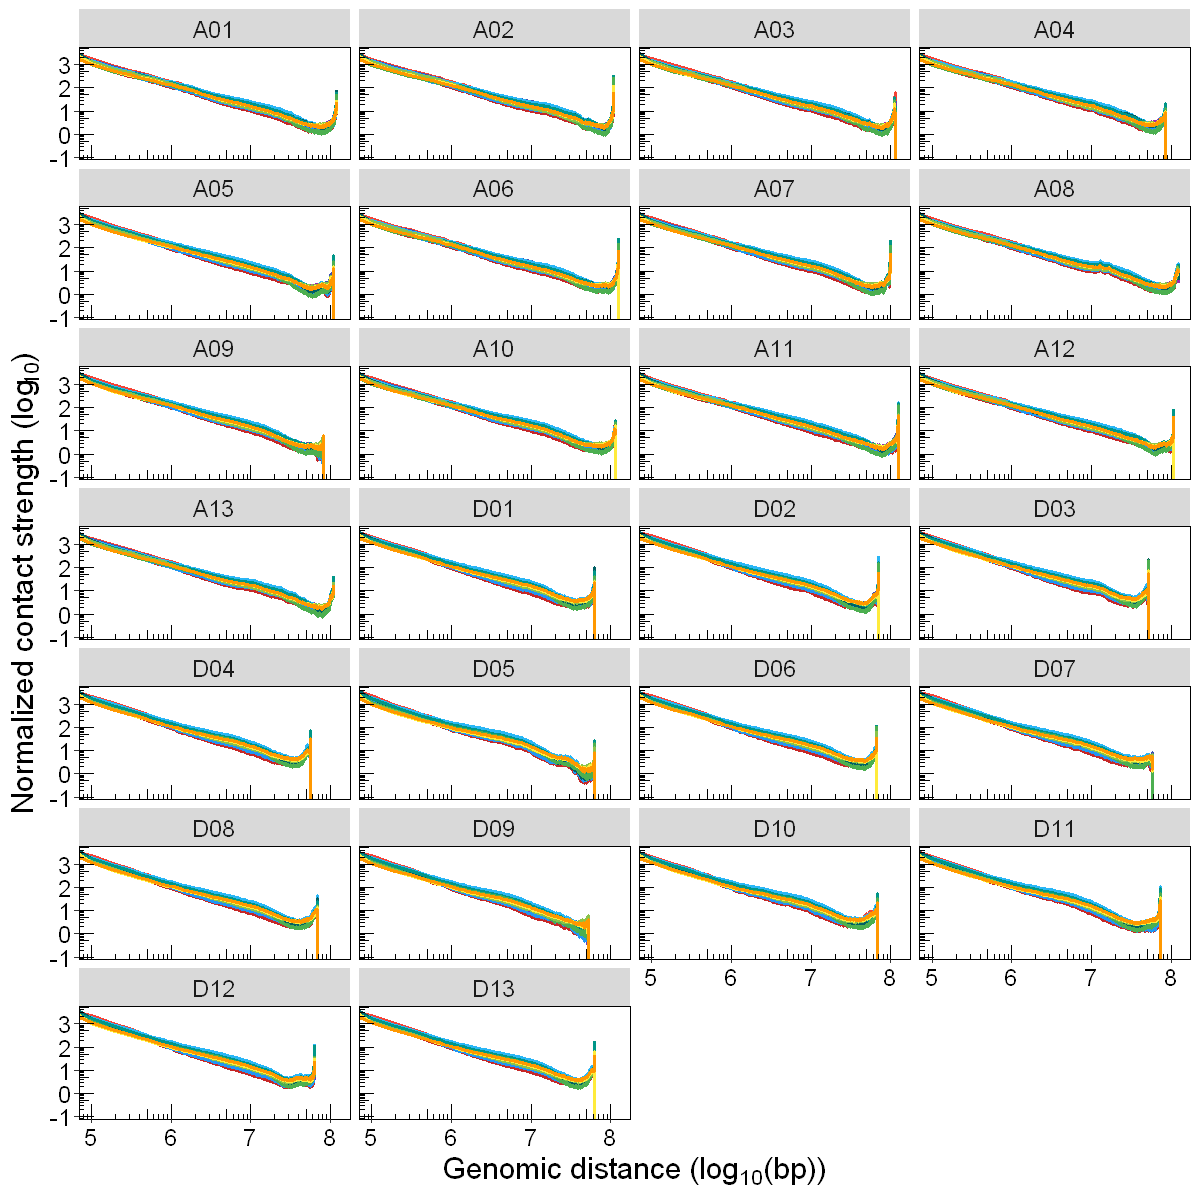

In [26]:
#分析ide的变化, 单条染色体
options(repr.plot.width=10, repr.plot.height=10)
rm(list=ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/ide/fanc')
library(ggplot2)
library(reshape2)
library(paletteer)
df_ide <- read.csv('all_sample_chr_IDE.txt', sep = '\t', header = T)
df_ide_long <- melt(df_ide, id = c("distance", "chrom"))
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
#head(pore_hic)
x_lab = expression(paste("Genomic distance (log"[10], "(bp))"))
y_lab = expression(paste("Normalized contact strength (log"[10], ")"))
ide <- ggplot(df_ide_long, aes(x=log10(distance), y=log10(value), group =variable, color = variable)) +
  geom_line(size=1)+
  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  labs(x=x_lab, y=y_lab, colour="Tissue") +   #不要标签
  #geom_smooth(se = FALSE) +
  facet_wrap(~chrom, ncol=4)+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill=NA,color="black",  linetype="solid"), # 添加边框
    #axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=14,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=18), #设置标签字体
    legend.position="None", #调整图例,
    strip.text.x = element_text(size=14)
    #legend.spacing.y = unit(0.3, 'cm'),
    #legend.key.size = unit(0.4, 'cm'),
    #legend.key.height=unit(0.6,"line"),
    #legend.background=element_rect(fill=FALSE),
    #plot.title = element_text(hjust = 0.5) # 设置标签居中
  ) +
  scale_color_paletteer_d("awtools::bpalette")+
  annotation_logticks()
ide
ggsave(plot =ide, filename = 'all_sample_chr_IDE.pdf', height = 14, width = 14,  dpi = 300)
ggsave(plot =ide, filename = 'all_sample_chr_IDE.png', height = 14, width = 14,  dpi = 300)

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

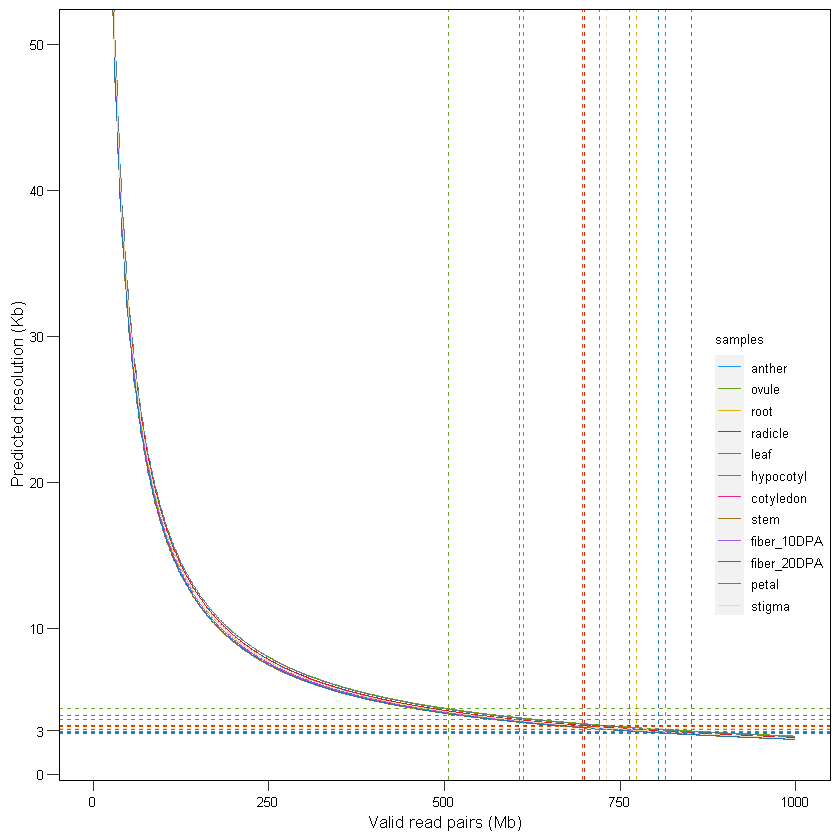

In [8]:
#分析HiCRes做分辨率曲线
rm(list=ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/resolution')
library(ggplot2)
library(reshape2)
library(paletteer)
df_hicres <- read.csv('all_sample_hicres.txt', sep = '\t', header = T)
df_hicres <- within(df_hicres, samples <- factor(samples, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df_hicres, levels(samples))
#df_hicres <- within(df_hicres, samples <- factor(samples, levels = c('anthers', 'leaf',  'root', 'hypocotyl', "cotyledon")))
#with(df_hicres, levels(samples))
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
#head(pore_hic)
#x_lab = expression(paste("Genomic distance (log"[10], "(bp))"))
#y_lab = expression(paste("Normalized contact strength (log"[10], ")"))
ide <- ggplot(df_hicres, aes(x=Valid_Reads/1000000, y=Predicted_Resolution/1000, group =samples, color = samples)) +
  geom_line(size=0.5)+
  # anthers
  geom_hline(aes(yintercept=3.730856063956167), linetype="dashed", color = "#2196F3")+
  geom_vline(aes(xintercept=611.793774), linetype="dashed", color = "#2196F3")+
  # ovule

  # root
  geom_hline(aes(yintercept=3.0476184075788997), linetype="dashed", color = "#E2AE09")+
  geom_vline(aes(xintercept=773.256743), linetype="dashed", color = "#E2AE09")+
  
  # petal
  geom_hline(aes(yintercept=4.035795174373273), linetype="dashed", color = "#607D8B")+
  geom_vline(aes(xintercept=606.528208), linetype="dashed", color = "#607D8B")+
  
  # radicle
  geom_hline(aes(yintercept=3.323761742434149), linetype="dashed", color = "#E6191E")+
  geom_vline(aes(xintercept=699.926761), linetype="dashed", color = "#E6191E")+

  # leaf
  geom_hline(aes(yintercept=3.270347996664497), linetype="dashed", color =  "#D95204")+
  geom_vline(aes(xintercept=696.847694), linetype="dashed", color =  "#D95204")+

  # hypocotyl
  geom_hline(aes(yintercept=3.0902958085600185), linetype="dashed", color = "#7571B2")+
  geom_vline(aes(xintercept=719.978141), linetype="dashed", color = "#7571B2")+
  # cotyledon
  geom_hline(aes(yintercept=2.7742330268036885), linetype="dashed", color = "#E6298D")+
  geom_vline(aes(xintercept=851.023508), linetype="dashed", color = "#E6298D")+

  # fiber_10DPA
  geom_hline(aes(yintercept=2.8369681488818137), linetype="dashed", color = "#A55CED")+
  geom_vline(aes(xintercept=815.071357), linetype="dashed", color = "#A55CED")+

  # fiber_20DPA
  geom_hline(aes(yintercept=2.8481333885073163), linetype="dashed", color = "#1E79B2")+
  geom_vline(aes(xintercept=804.417875), linetype="dashed", color = "#1E79B2")+

  #ovule
  geom_hline(aes(yintercept=4.491103732170148), linetype="dashed", color = "#69A71E")+
  geom_vline(aes(xintercept=505.270278), linetype="dashed", color = "#69A71E")+

  #stem
  geom_hline(aes(yintercept=2.9555837955106117), linetype="dashed", color = "#A6751B")+
  geom_vline(aes(xintercept=764.013144), linetype="dashed", color = "#A6751B")+  

  #stigma
  geom_hline(aes(yintercept=3.161187127837878), linetype="dashed", color = "#efdab4")+
  geom_vline(aes(xintercept=731.003776), linetype="dashed", color = "#efdab4")+  

  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  labs(x="Valid read pairs (Mb)", y="Predicted resolution (Kb)") +   #不要标签
  #geom_smooth(se = FALSE) +
  #facet_grid(subgenome~days)+
  coord_cartesian(ylim = c(2, 50))+
  scale_y_continuous(breaks = c(0, 3, 10, 20, 30, 40, 50))+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill=NA), # 添加边框
    axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=8,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=10), #设置标签字体
    legend.position=c(0.92, 0.4), #调整图例,
    #legend.spacing.y = unit(0.3, 'cm'),
    #legend.key.size = unit(0.4, 'cm'),
    legend.key.height=unit(0.6,"line"),
    legend.background=element_rect(fill=FALSE),
    axis.ticks.length=unit(0.25, 'cm')

  ) +
    scale_color_manual(values = c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))
ide
ggsave(plot =ide, filename = 'all_sample_hicres.pdf', height = 3.3, width = 4,  dpi = 300)
ggsave(plot =ide, filename = 'all_sample_hicres.png', height = 3.3, width = 4,  dpi = 300)

In [2]:
install.packages("reshape2")

also installing the dependency 'plyr'




package 'plyr' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpMrOG14\downloaded_packages


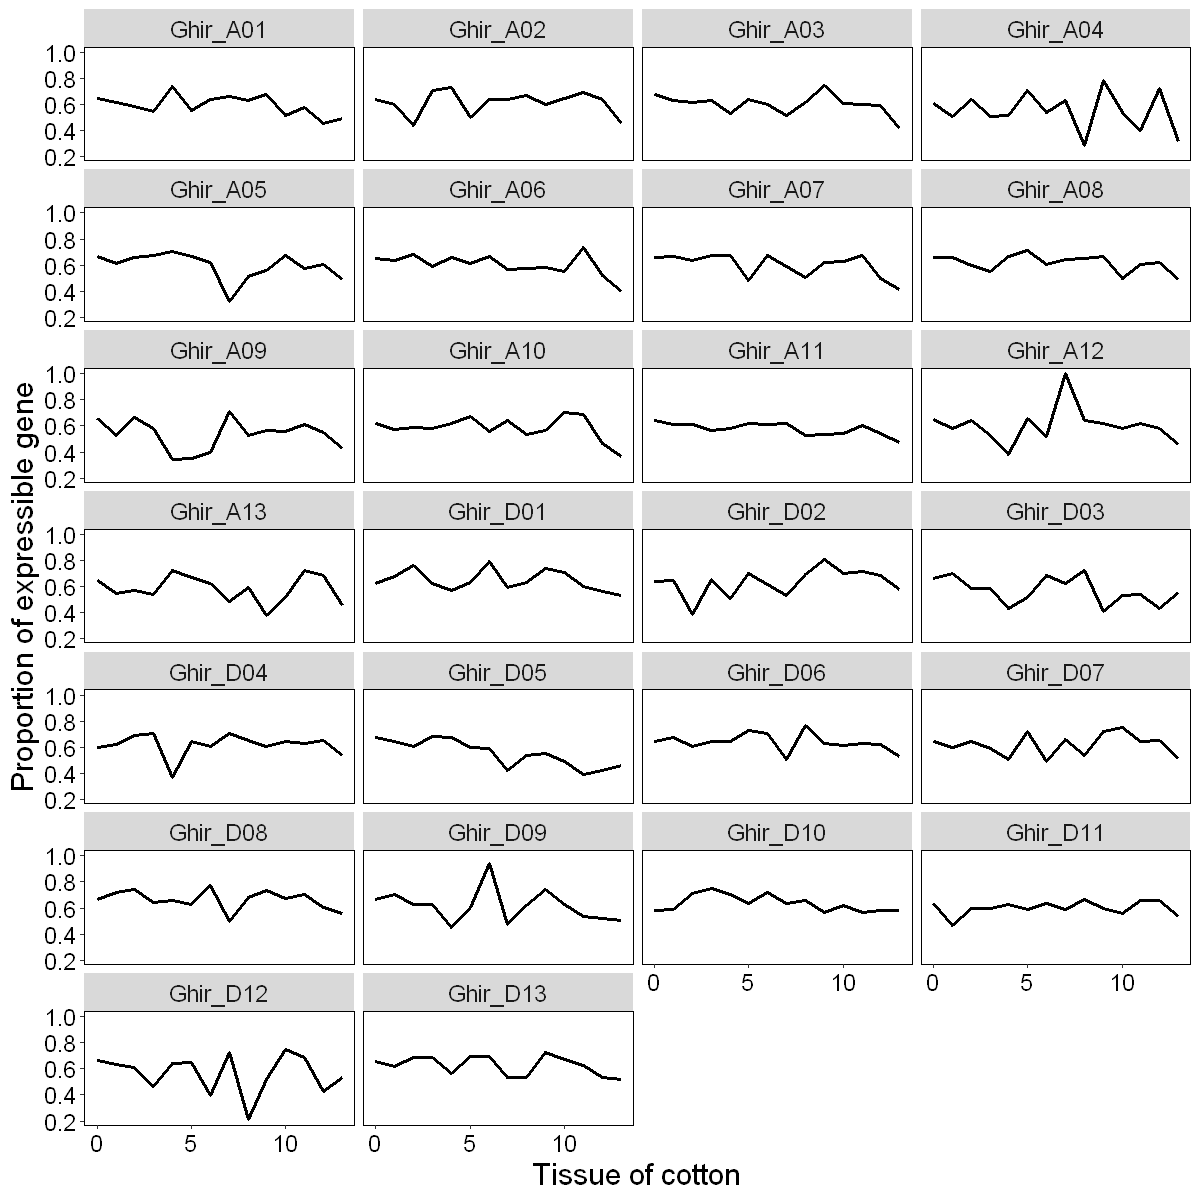

In [2]:
#分析ide的变化, 单条染色体
options(repr.plot.width=10, repr.plot.height=10)
rm(list=ls())
#setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/exp_gene')
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/exp_gene/dcHiC')
library(ggplot2)
library(reshape2)
library(paletteer)
df_ide <- read.csv('all_diff_cpt_gene_Bcpt_ratio.bed', sep = '\t', header = T)
#df_ide_long <- melt(df_ide, id = c("distance", "chrom"))
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
#head(pore_hic)
#x_lab = expression(paste("Genomic distance (log"[10], "(bp))"))
#y_lab = expression(paste("Normalized contact strength (log"[10], ")"))
ide <- ggplot(df_ide, aes(x=tags, y=ratio)) +
  geom_line(size=1)+
  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  labs(x="Tissue of cotton", y="Proportion of expressible gene", colour="Tissue") +   #不要标签
  #geom_smooth(se = FALSE) +
  facet_wrap(~subg, ncol=4)+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill=NA,color="black",  linetype="solid"), # 添加边框
    #axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=14,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=18), #设置标签字体
    legend.position="None", #调整图例,
    strip.text.x = element_text(size=14)
    #legend.spacing.y = unit(0.3, 'cm'),
    #legend.key.size = unit(0.4, 'cm'),
    #legend.key.height=unit(0.6,"line"),
    #legend.background=element_rect(fill=FALSE),
    #plot.title = element_text(hjust = 0.5) # 设置标签居中
  ) +
  scale_color_paletteer_d("awtools::bpalette")
ide
ggsave(plot =ide, filename = 'all_sample_chr_IDE.pdf', height = 10, width = 10,  dpi = 300)
ggsave(plot =ide, filename = 'all_sample_chr_IDE.png', height = 10, width = 10,  dpi = 300)

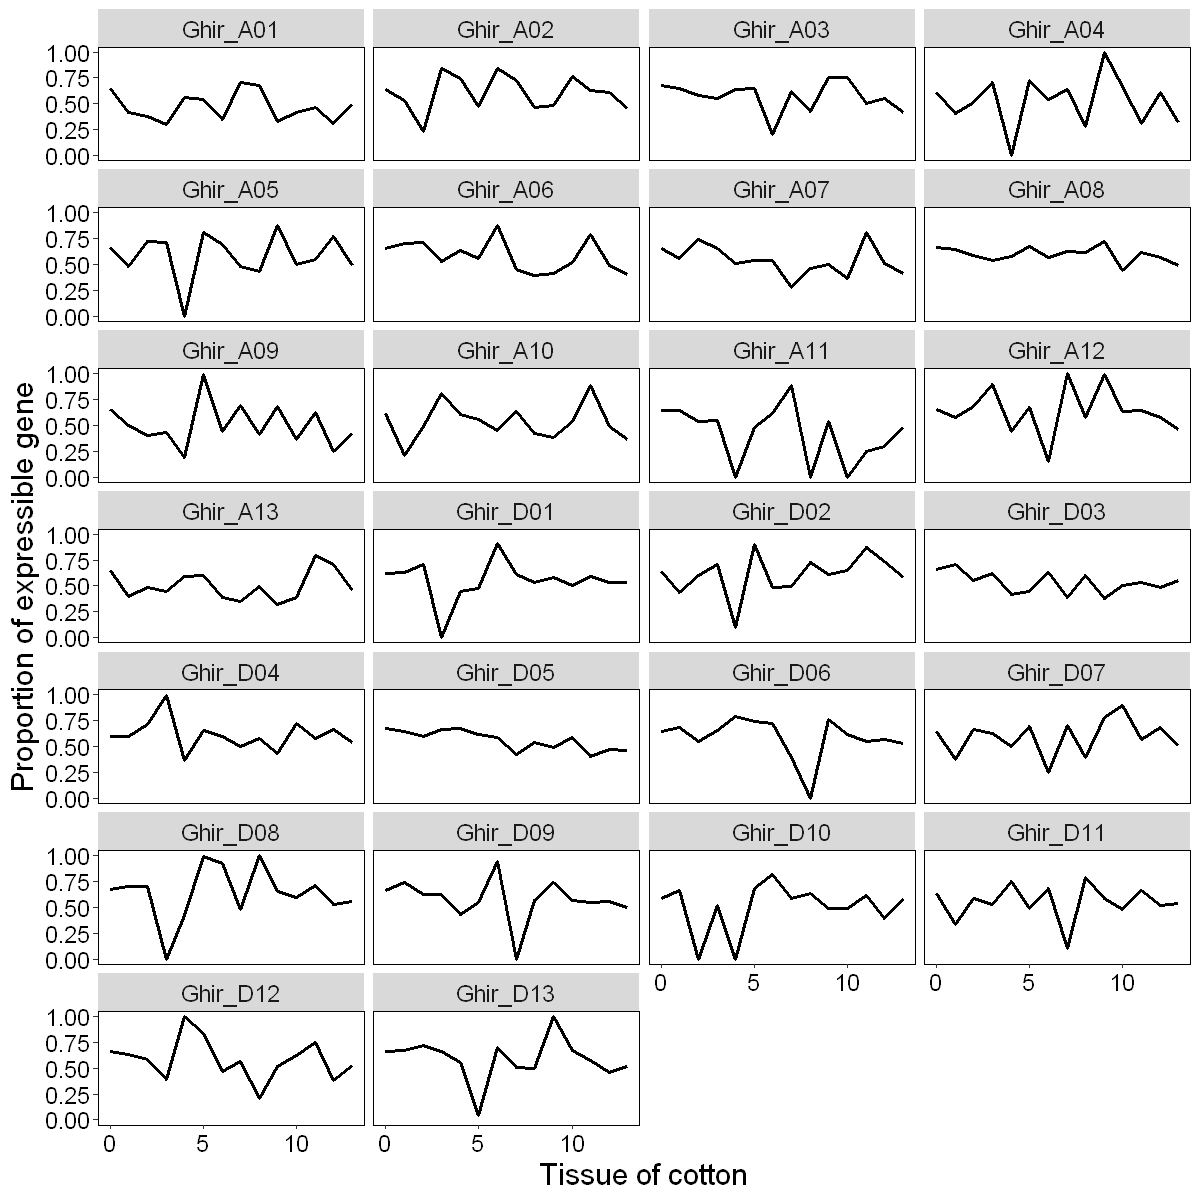

In [5]:
#分析ide的变化, 单条染色体
options(repr.plot.width=10, repr.plot.height=10)
rm(list=ls())
#setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/exp_gene')
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/dcHiC')
library(ggplot2)
library(reshape2)
library(paletteer)
df_ide <- read.csv('all_diff_cpt_gene_Bcpt_ratio.bed', sep = '\t', header = T)
#df_ide_long <- melt(df_ide, id = c("distance", "chrom"))
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
#head(pore_hic)
#x_lab = expression(paste("Genomic distance (log"[10], "(bp))"))
#y_lab = expression(paste("Normalized contact strength (log"[10], ")"))
ide <- ggplot(df_ide, aes(x=tags, y=ratio)) +
  geom_line(size=1)+
  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  labs(x="Tissue of cotton", y="Proportion of expressible gene", colour="Tissue") +   #不要标签
  #geom_smooth(se = FALSE) +
  facet_wrap(~subg, ncol=4)+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill=NA,color="black",  linetype="solid"), # 添加边框
    #axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=14,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=18), #设置标签字体
    legend.position="None", #调整图例,
    strip.text.x = element_text(size=14)
    #legend.spacing.y = unit(0.3, 'cm'),
    #legend.key.size = unit(0.4, 'cm'),
    #legend.key.height=unit(0.6,"line"),
    #legend.background=element_rect(fill=FALSE),
    #plot.title = element_text(hjust = 0.5) # 设置标签居中
  ) +
  scale_color_paletteer_d("awtools::bpalette")
ide
ggsave(plot =ide, filename = 'all_sample_chr_IDE.pdf', height = 10, width = 10,  dpi = 300)
ggsave(plot =ide, filename = 'all_sample_chr_IDE.png', height = 10, width = 10,  dpi = 300)

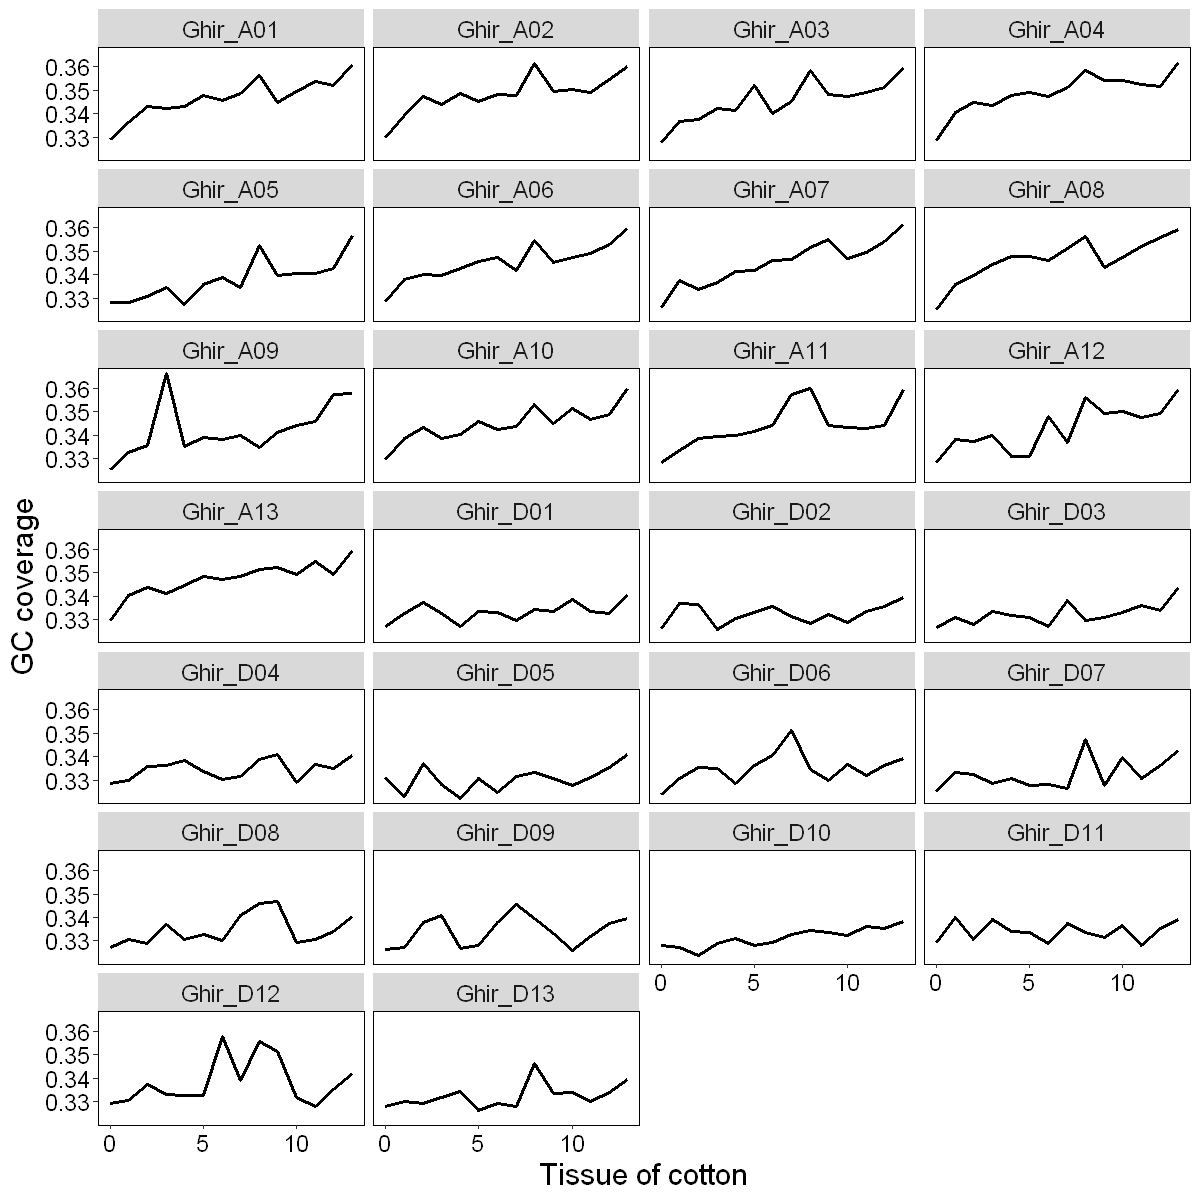

In [2]:
#分析ide的变化, 单条染色体
options(repr.plot.width=10, repr.plot.height=10)
rm(list=ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/GC_cov')
library(ggplot2)
library(reshape2)
library(paletteer)
df_ide <- read.csv('all_diff_cpt_GC_Bcpt_chr.bed', sep = '\t', header = T)
#df_ide_long <- melt(df_ide, id = c("distance", "chrom"))
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
#head(pore_hic)
#x_lab = expression(paste("Genomic distance (log"[10], "(bp))"))
#y_lab = expression(paste("Normalized contact strength (log"[10], ")"))
ide <- ggplot(df_ide, aes(x=tags, y=ratio)) +
  geom_line(size=1)+
  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  labs(x="Tissue of cotton", y="GC coverage") +   #不要标签
  #geom_smooth(se = FALSE) +
  facet_wrap(~subg, ncol=4)+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill=NA,color="black",  linetype="solid"), # 添加边框
    #axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=14,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=18), #设置标签字体
    legend.position="None", #调整图例,
    strip.text.x = element_text(size=14)
    #legend.spacing.y = unit(0.3, 'cm'),
    #legend.key.size = unit(0.4, 'cm'),
    #legend.key.height=unit(0.6,"line"),
    #legend.background=element_rect(fill=FALSE),
    #plot.title = element_text(hjust = 0.5) # 设置标签居中
  ) +
  scale_color_paletteer_d("awtools::bpalette")
ide
ggsave(plot =ide, filename = 'all_diff_cpt_GC_Bcpt_chr.pdf', height = 10, width = 10,  dpi = 300)
ggsave(plot =ide, filename = 'all_diff_cpt_GC_Bcpt_chr.png', height = 10, width = 10,  dpi = 300)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



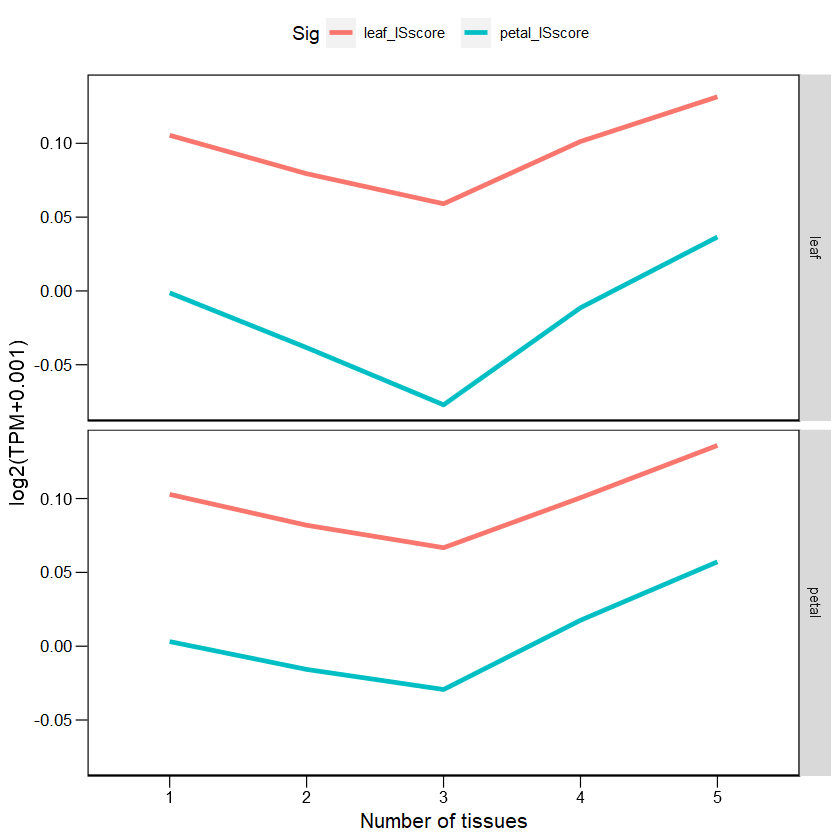

In [5]:
## 分析组织特异表达基因局部互作 是否具有差异
rm(list = ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/TSG_IS_score')
library(ggplot2)
library(ggpubr)
library(paletteer)
library(ggsci)
library(circlize)
library(RColorBrewer)
#col_number = colorRampPalette(brewer.pal(9, "YlOrRd"))(13)
#compaired = list(c("0", '1'), c("1", '2'), c("2", '3'), c("3", '4'), c("4", '5'), c("5", '6'), c("6", '7'), c("7", '8'), c("8", '9'), c("9", '10'), c("10", '11'), c("11", '12'))
df <- read.csv('petal_leaf_TSG_IS_score.csv',  header = T)
fg <- ggplot(df, aes(x=as.factor(tags), y=IS_score, group =Sig, color = Sig)) +
#geom_boxplot(width=0.8, notch = TRUE)+
geom_smooth(method = 'loess',se = FALSE )+
labs(x="Number of tissues", y='log2(TPM+0.001)')+
facet_grid(TAU~.)+
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     #axis.line=element_line(linetype=1,color="black", size=0.25),
     panel.border = element_rect(fill=NA),
     legend.position='top',
     axis.text = element_text(size=10, color='black'),
     axis.ticks.length = unit(0.25, 'cm'),
     axis.ticks = element_line(color='black', size=0.25),
     axis.title = element_text(size=12)
     )
     #scale_fill_manual(values=col_number)
     #geom_signif(comparisons = compaired,  step_increase = 0.04, test =wilcox.test, tip_length=0.03, map_signif_level = TRUE, y_position=4.5)
fg
ggsave(plot =fg, filename = 'petal_leaf_TSG_IS_score.pdf', height =4, width = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



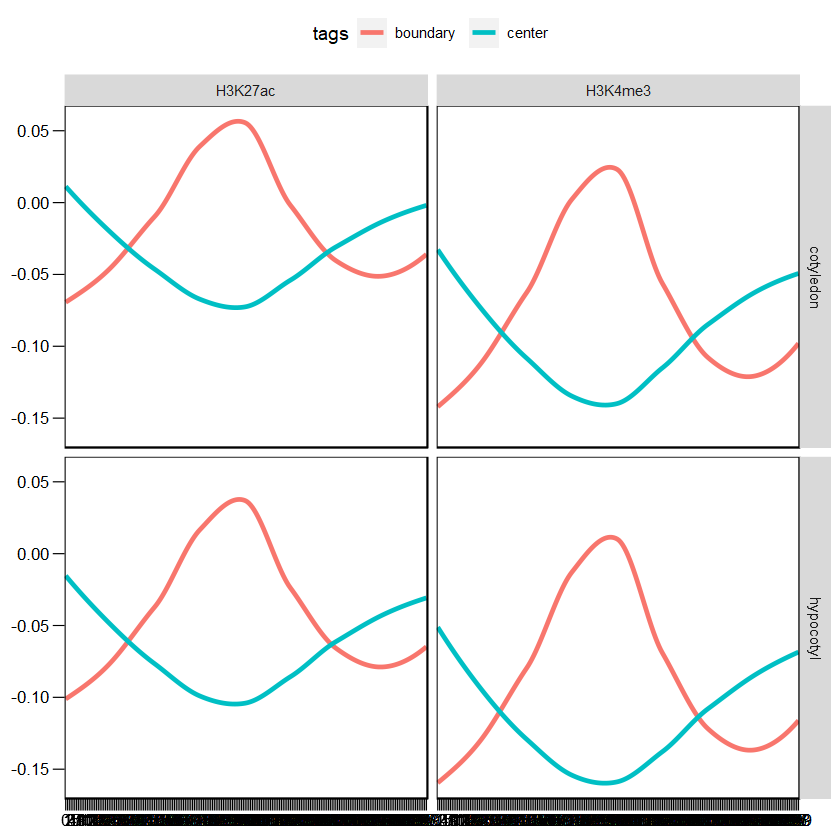

In [6]:
## 分析组织特异表达基因局部互作 是否具有差异
rm(list = ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/BC_ChIP_peaks')
library(ggplot2)
library(ggpubr)
library(paletteer)
library(ggsci)
library(circlize)
library(RColorBrewer)
#col_number = colorRampPalette(brewer.pal(9, "YlOrRd"))(13)
#compaired = list(c("0", '1'), c("1", '2'), c("2", '3'), c("3", '4'), c("4", '5'), c("5", '6'), c("6", '7'), c("7", '8'), c("8", '9'), c("9", '10'), c("10", '11'), c("11", '12'))
df <- read.csv('hypocotyl_cotyledon_BC_ChiP.csv',  header = T)
fg <- ggplot(df, aes(x=as.factor(index), y=values, group =tags, color = tags)) +
#geom_boxplot(width=0.8, notch = TRUE)+
geom_smooth(method = 'loess',se = FALSE )+
labs(x=NULL, y=NULL)+
facet_grid(tissues~single)+
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     #axis.line=element_line(linetype=1,color="black", size=0.25),
     panel.border = element_rect(fill=NA),
     legend.position='top',
     axis.text = element_text(size=10, color='black'),
     axis.ticks.length = unit(0.25, 'cm'),
     axis.ticks = element_line(color='black', size=0.25),
     axis.title = element_text(size=12)
     )
     #scale_fill_manual(values=col_number)
     #geom_signif(comparisons = compaired,  step_increase = 0.04, test =wilcox.test, tip_length=0.03, map_signif_level = TRUE, y_position=4.5)
fg
ggsave(plot =fg, filename = 'petal_leaf_TSG_IS_score.pdf', height =4, width = 5)

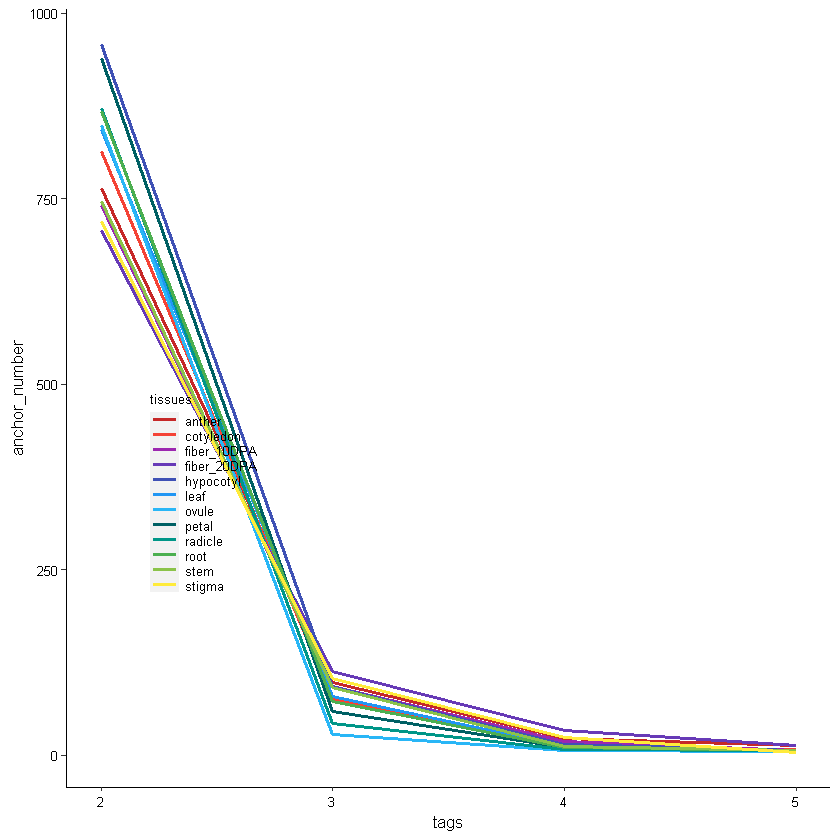

In [7]:
#分析基因所包含的loop互作强度
rm(list=ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/7K_anchor')
library(ggplot2)
library(reshape2)
library(paletteer)
df <- read.csv('J668_gene_7Kanchor_ratio_order.csv',  header = T)
df_need <- df[df$tags<6 & df$tags>1, ]
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
#head(pore_hic)
#x_lab = expression(paste("Genomic distance (log"[10], "(bp))"))
#y_lab = expression(paste("Normalized contact strength (log"[10], ")"))
ide <- ggplot(df_need, aes(x=tags, y=anchor_number, group =tissues, color = tissues)) +
  geom_line(size=1)+
  #geom_smooth(size=1)+
  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  #labs(x=x_lab, y=y_lab, colour="Tissue") +   #不要标签
  #geom_smooth(se = FALSE) +
  #facet_grid(subgenome~days)+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    #panel.border = element_rect(fill=NA,color="black",  linetype="solid"), # 添加边框
    axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=8,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=10), #设置标签字体
    legend.position=c(0.18, 0.38), #调整图例,
    #legend.spacing.y = unit(0.3, 'cm'),
    #legend.key.size = unit(0.4, 'cm'),
    legend.key.height=unit(0.6,"line"),
    legend.background=element_rect(fill=FALSE),
    plot.title = element_text(hjust = 0.5) # 设置标签居中
  ) +
  scale_color_paletteer_d("awtools::bpalette")
  #annotation_logticks()
ide
ggsave(plot =ide, filename = 'J668_gene_7Kanchor_ratio_order.pdf', height = 3.3, width = 4,  dpi = 300)
#ggsave(plot =ide, filename = 'all_sample_IDE.png', height = 3.3, width = 4,  dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


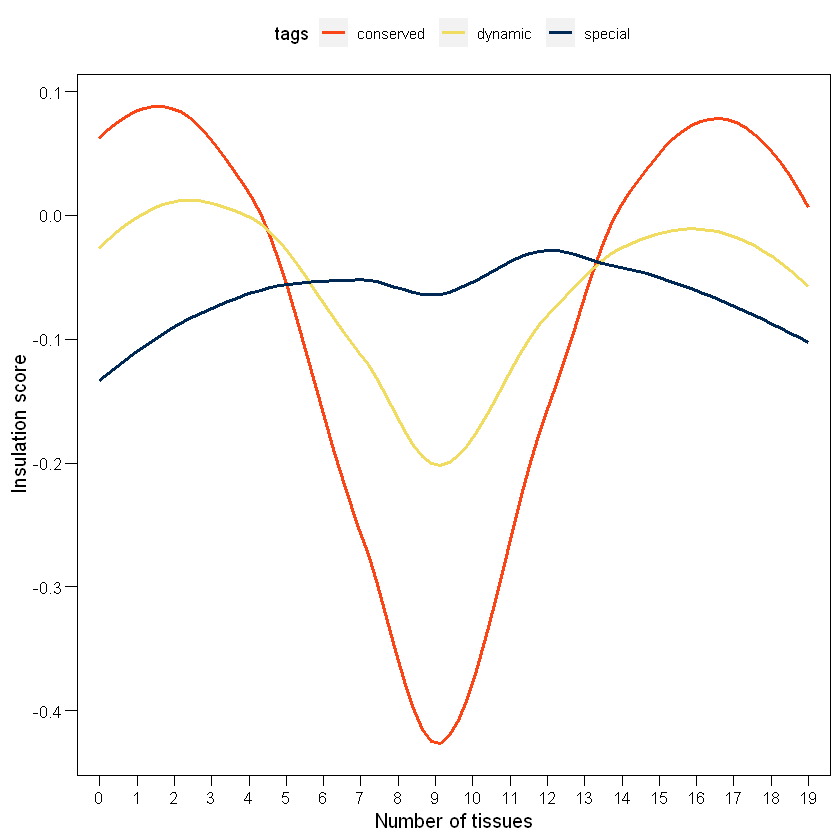

In [10]:
## 分析组织特异表达基因局部互作 是否具有差异
rm(list = ls())
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD')
library(ggplot2)
library(ggpubr)
library(paletteer)
library(ggsci)
library(circlize)
library(RColorBrewer)
df <- read.csv('J668_conserved_boundary_IS_mean.csv',  header = T)
fg <- ggplot(df, aes(x=as.factor(order), y=is, group =tags, color = tags)) +
#geom_boxplot(width=0.8, notch = TRUE)+
geom_smooth(method = 'loess',se = FALSE )+
labs(x="Number of tissues", y='Insulation score')+
#facet_grid(TAU~.)+
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     #axis.line=element_line(linetype=1,color="black", size=0.25),
     panel.border = element_rect(fill=NA),
     legend.position='top',
     axis.text = element_text(size=10, color='black'),
     axis.ticks.length = unit(0.25, 'cm'),
     axis.ticks = element_line(color='black', size=0.25),
     axis.title = element_text(size=12)
     )+
     scale_color_manual(values=c("#FA4616FF", "#EFDC60FF", "#002855FF"))
fg
ggsave(plot =fg, filename = 'J668_conserved_boundary_IS_mean.pdf', height =4, width = 5)